In [7]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
import matplotlib


from skimage.morphology import disk
from skimage.feature import blob_log
from skimage.filters import gaussian

### import code from src folder
import sys
import os
sys.path.append('../../src')
import viz
import log_blobs_detector 
import traj_descriptors as td

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(font_scale=1.5)


In [8]:
FileList=glob('../../data/dt_300/Detected*.csv')
Blobs=pd.DataFrame()

for file_name in FileList:
    Data=pd.read_csv(file_name)
    Blobs=pd.concat([Blobs,Data])


In [9]:
 Blobs.shape

(327367, 13)

## Filter

In [10]:
 Blobs=Blobs[Blobs["contrast"]>0.06]

## Number of microcolonies vs time

In [11]:
def blobs_counter(df,cut):
    Count=df.groupby(['frame']).apply(lambda x: len(x['radius']))
    A=Count.reset_index('frame')
    A=A.rename(columns={A.columns[1]:"Count"})
    A['Count_correct']=A['Count']-np.min(A['Count'])
    return A

df_Counter=pd.DataFrame()
for id, group in Blobs.groupby("file_id"):
    for (cut,idd) in group.groupby('cut'):
        print(id,cut)
        df_counter=blobs_counter(idd,cut)
        df_counter["file_id"]=id
        df_counter["cut"]=cut
        df_Counter=pd.concat([df_Counter,df_counter])

43048 1
43048 2
43048 3
43048 4
43113 1
43113 2
43113 3
43113 4
43118 1
43118 2
43118 3
43118 4


In [61]:
#df_Counter.frame[df_Counter["file_id"]==43048]=df_Counter.frame[df_Counter["file_id"]==43048]+50

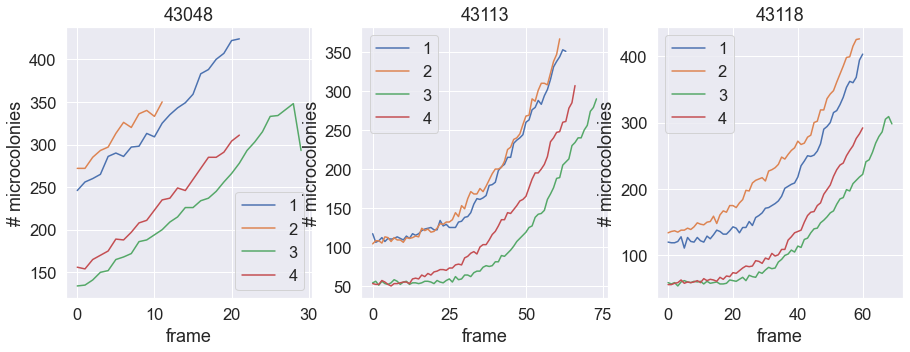

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
axx=ax.ravel()
counter=0

for id,group in df_Counter.groupby("file_id"):
    for cut,group_cut in group.groupby("cut"):
        axx[counter].plot(group_cut["frame"],group_cut["Count"],label=cut)
        axx[counter].legend()
        axx[counter].set_xlabel("frame")
        axx[counter].set_ylabel("# microcolonies")
        axx[counter].set_title("{}".format(id))
    counter=counter+1


    

 #### corrected
   
    
    

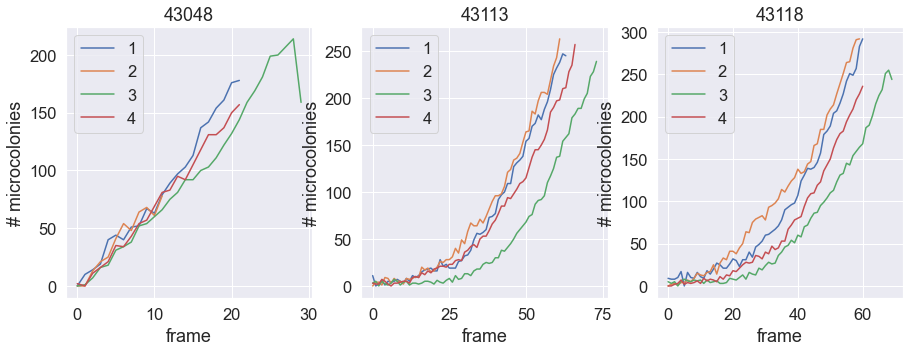

In [63]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
axx=ax.ravel()
counter=0

for id,group in df_Counter.groupby("file_id"):
    for cut,group_cut in group.groupby("cut"):
        axx[counter].plot(group_cut["frame"],group_cut["Count_correct"],label=cut)
        axx[counter].legend()
        axx[counter].set_xlabel("frame")
        axx[counter].set_ylabel("# microcolonies")
        axx[counter].set_title("{}".format(id))
    counter=counter+1


    

## Number of blobs 

<AxesSubplot:xlabel='frame', ylabel='Count'>

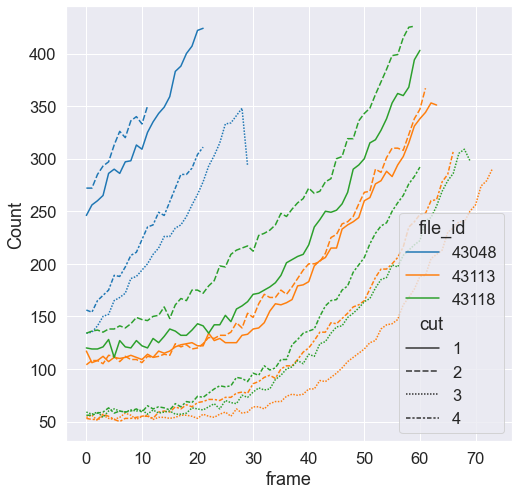

In [64]:
fig,axx=plt.subplots(nrows=1, ncols=1,figsize=(8,8))
sns.lineplot(data=df_Counter,x='frame',y='Count',hue='file_id',style="cut",palette="tab10",ax=axx)

## 2D Histogrammes


In [54]:
def plot_2d_histogramme(Data,attr,scale_label,ax):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    # data
    x = Data.frame
    y = Data[attr]
    
    # Big bins
    sns.set(font_scale=1.5)
    
    pl=ax.hist2d(x, y, bins=[len(Data.frame.unique()),15], cmap=plt.cm.jet);
    ax.set_xlabel("frame")
    ax.set_ylabel(attr+"  "+scale_label)
    ax.set_title(attr)
    ax.grid(False)
    cbar=fig.colorbar(pl[3], ax=ax)
    cbar.set_label("counts ")
    #fig.savefig(path+attr+"_2dhist.png",bbox_inches=None)
    

43048 1
43048 2
43048 3
43048 4
43113 1
43113 2
43113 3
43113 4
43118 1
43118 2
43118 3
43118 4


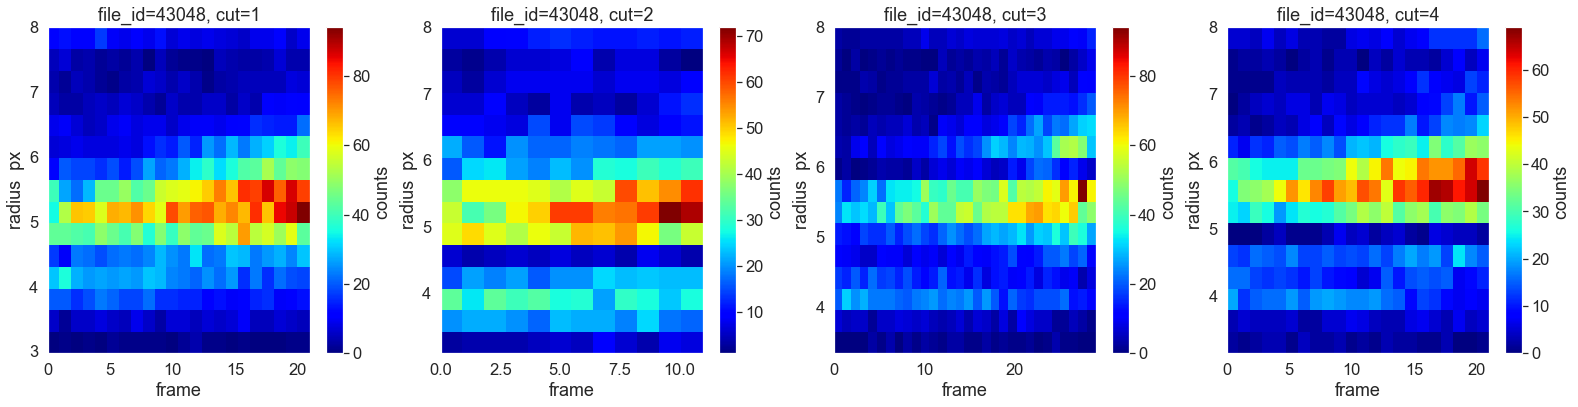

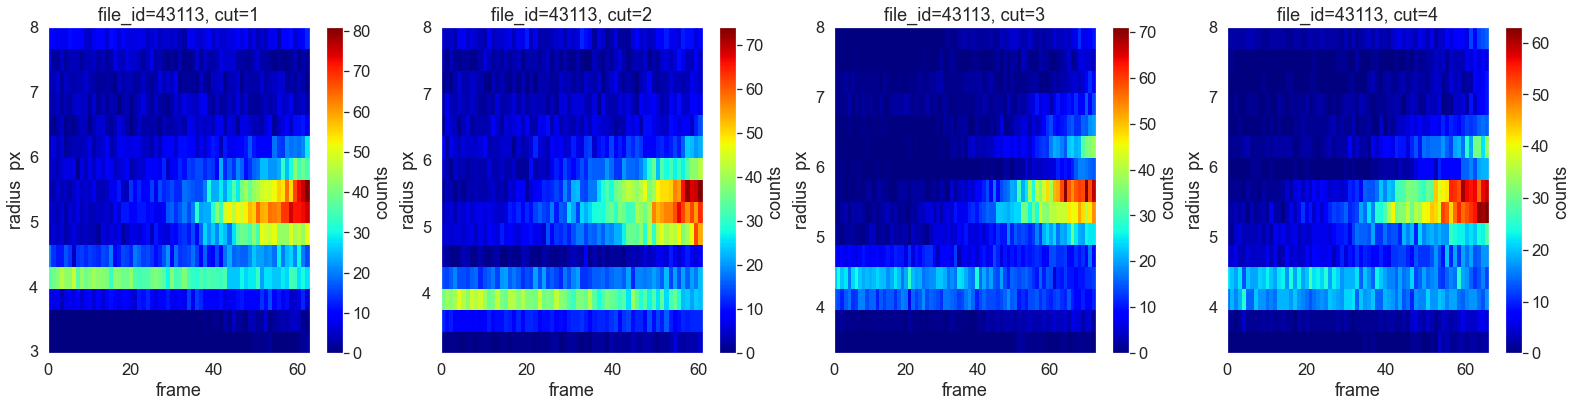

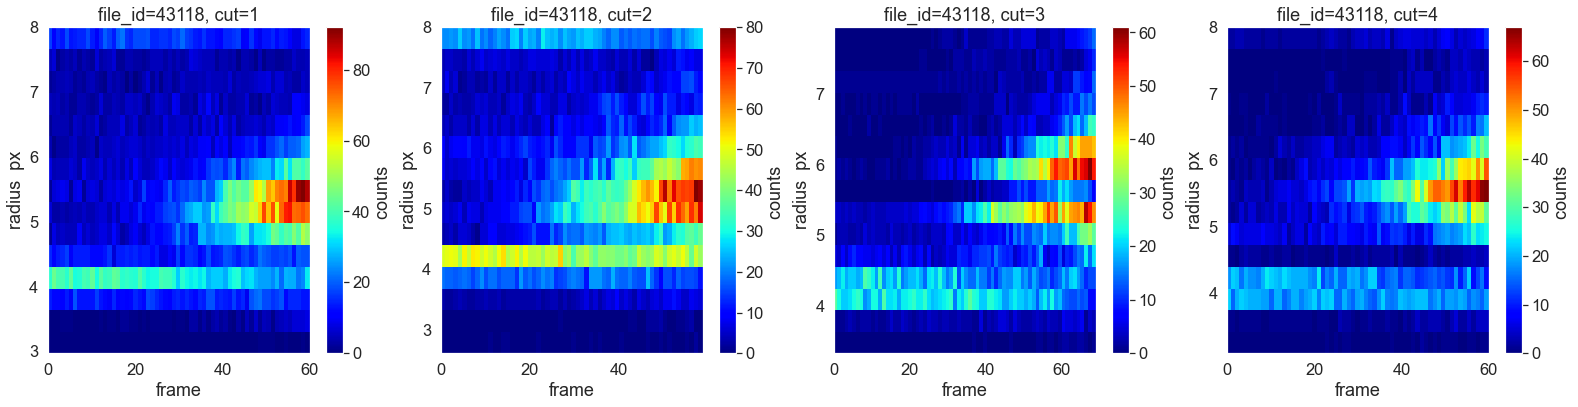

In [55]:
for id, group in Blobs.groupby("file_id"):
    fig,ax =plt.subplots(nrows=1, ncols=4,figsize=(27,6))
    counter=0
    for (cut,idd) in group.groupby('cut'):
        print(id,cut)
        plot_2d_histogramme(idd,'radius','px',ax[counter])
        ax[counter].set_title("file_id={}, cut={}".format(id,cut))
        counter=counter+1

In [13]:
np.max(Blobs['radius'])

8.0

In [14]:
FileList

['../../data/dt_300/Detected_blobs_43048.csv',
 '../../data/dt_300/Detected_blobs_43113.csv',
 '../../data/dt_300/Detected_blobs_43118.csv']

In [15]:
FileCatalog=pd.read_csv("../../data/dt_300/File_catalog_frame.csv")

In [16]:
path=FileCatalog[(FileCatalog["file_id"]==43113) & (FileCatalog["cut"]==2)].path.values[0]

blobs_select=Blobs[(Blobs["file_id"]==43113) & (Blobs["cut"]==2)]

In [17]:
images=io.imread(path)

frame=10


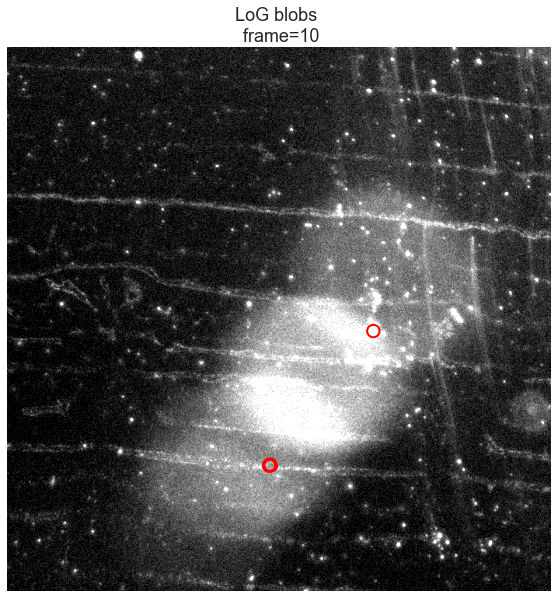

In [41]:
fig,ax=plt.subplots(figsize=(10,10))
viz.blobs_img_overlay(images[frame],blobs_select.loc[indexes],frame,ax,color='red')

In [28]:
indexes=blobs_select[blobs_select.radius==np.max(blobs_select.radius)].index